<a href="https://colab.research.google.com/github/JorgeSedek/tp1_orga_datos/blob/main/C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


C4) ¿Cúal es la productora con entropía base 2 más alta para la distribución de los idiomas originales de sus producciones?

In [ ]:
df_peliculas = pd.read_csv('/content/drive/MyDrive/orgaDatos/Movie dataset/movies.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_companias = pd.read_csv('/content/drive/MyDrive/orgaDatos/Movie dataset/companies.csv')

In [ ]:
df_companias = df_companias.rename(columns={"id": "production_companies"})
df_companias['name'] = df_companias['name'].astype('string')
df_companias['production_companies'] = df_companias['production_companies']
df_companias['production_companies']
df_peliculas = df_peliculas[df_peliculas['original_language'].astype('str').apply(lambda x: not x.replace(".","").isnumeric())]

In [ ]:
df_peliculas['production_companies'] = df_peliculas['production_companies'].dropna().astype('string').map(lambda x : x.split(','))
df_peliculas = df_peliculas.explode('production_companies')
df_peliculas = df_peliculas[~df_peliculas['production_companies'].isnull()]
df_companias['production_companies']

0            3
1          559
2         2550
3        10201
4         6194
         ...  
23687    85400
23688    27570
23689    27571
23690    19653
23691    88753
Name: production_companies, Length: 23692, dtype: int64

In [ ]:
df_peliculas['production_companies'].unique()
df_companias['production_companies']
df_companias['production_companies'] = df_companias['production_companies'].astype('float64')
df_peliculas['production_companies'] = df_peliculas['production_companies'].astype('float64')
df_companias_expandido = df_companias.merge(df_peliculas, how='outer', on='production_companies')
df_companias_expandido

,production_companies,name,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,3.0,Pixar Animation Studios,False,Toy Story Collection,30000000,"Animation,Comedy,Family",http://toystory.disney.com/toy-story,862,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,3.0,Pixar Animation Studios,False,NaN,120000000,"Adventure,Animation,Comedy,Family",http://movies.disney.com/a-bugs-life,9487,tt0120623,en,...,1998-11-25,363258859.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An epic presentation of miniature proportions.,A Bug's Life,False,6.8,2379.0
2,3.0,Pixar Animation Studios,False,Toy Story Collection,90000000,"Animation,Comedy,Family",http://toystory.disney.com/toy-story-2,863,tt0120363,en,...,1999-10-30,497366869.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The toys are back!,Toy Story 2,False,7.3,3914.0
3,3.0,Pixar Animation Studios,False,"Monsters, Inc. Collection",115000000,"Animation,Comedy,Family",http://movies.disney.com/monsters-inc,585,tt0198781,en,...,2001-11-01,562816256.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,We Scare Because We Care.,"Monsters, Inc.",False,7.5,6150.0
4,3.0,Pixar Animation Studios,False,Finding Nemo Collection,94000000,"Animation,Family",http://movies.disney.com/finding-nemo,12,tt0266543,en,...,2003-05-30,940335536.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There are 3.7 trillion fish in the ocean. They...,Finding Nemo,False,7.6,6292.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70540,85400.0,He and She Films,False,NaN,0,"Comedy,Drama",NaN,420346,tt4130180,en,...,2015-01-11,0.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What happened last night?,The Morning After,False,4.0,2.0
70541,27570.0,Neptune Salad Entertainment,False,NaN,0,Horror,NaN,289923,tt0252966,en,...,2000-10-03,0.0,30.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Do you know what happened 50 years before ""The...",The Burkittsville 7,False,7.0,1.0
70542,27571.0,Pirie Productions,False,NaN,0,Horror,NaN,289923,tt0252966,en,...,2000-10-03,0.0,30.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Do you know what happened 50 years before ""The...",The Burkittsville 7,False,7.0,1.0
70543,19653.0,Sine Olivia,False,NaN,0,Drama,NaN,111109,tt2028550,tl,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0


In [ ]:
df_companias_prob = df_companias_expandido[['name','original_language']]
df_companias_prob = df_companias_prob.groupby(['name','original_language']).size().reset_index()
df_companias_prob = df_companias_prob.rename(columns={0:'cantidad'})
df_companias_prob[df_companias_prob['cantidad'] > 1]
df_companias_prob['cantidad'].unique()

array([   1,    2,    4,    5,   12,   19,    7,   17,   22,   10,   15,
         20,    6,   36,    3,    8,    9,   43,   11,   21,   18,   13,
         27,   46,   16,   14,   76,   83,   35,   39,   24,   40,   29,
         23,   62,  128,   30,   52,  109,   33,   65,   26,  132,  257,
         38,   41,   78,  117,   77,   32,   57,  426,  437,   25,   61,
         50,   95,   49,   34,   45,   31,   79,   28,   47,   68,   54,
         59,   91,  123,   53,   69,   37,   89,   42,   97,   44, 1057,
        176,   64,   56,  158,  273,   55,   70,   66,   48,  110,  970,
         51,  284,   60,  105,  119,   73,   88,  131,  221,  196,  824,
        266,   96,  819,  260, 1209,   85])

In [ ]:
idiomas = list(df_companias_prob['original_language'].astype('string').unique())
cantidad_idiomas = len(idiomas)
cantidad_idiomas

85

In [ ]:
df_companias_totales = df_companias_prob.groupby(['name']).sum().reset_index()
df_companias_totales = df_companias_totales.rename(columns={'cantidad':'totales'})
df_companias_totales[df_companias_totales['totales'] > 1]


,name,totales
11,1.85 Films,2
13,100 Bares,2
24,10th Hole Productions,4
25,11:11 Mediaworks,3
27,120 Films,6
...,...,...
23508,Одесская киностудия,2
23513,СТВ,2
23514,Союзмультфильм,2
23522,㈜팔레트픽처스,2


In [ ]:
df_prob = df_companias_totales.merge(df_companias_prob, how='right', on='name')
df_prob['prob'] = df_prob['cantidad'] / df_prob['totales']
df_prob['name'] = df_prob['name'].astype('string')

In [ ]:
df_prob_lenguaje = df_prob.groupby(['name'])['original_language','prob'].agg(list)
df_prob_lenguaje['prob']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


name
"DIA" Productions GmbH & Co. KG    [1.0]
# Andrea Sperling Productions      [1.0]
# Lexyn Productions                [1.0]
'A' Production Committee           [1.0]
(주)로드픽쳐스                           [1.0]
                                   ...  
영화사 집                              [1.0]
이디오플랜                              [1.0]
인벤트 디                              [1.0]
타임스토리그룹                            [1.0]
프로덕션M                              [1.0]
Name: prob, Length: 23535, dtype: object

In [ ]:
companias = df_companias_expandido[['name','belongs_to_collection']]['name'].value_counts().to_frame().reset_index()
companias = companias.rename(columns = {'index':'name','name':'cant_peliculas'})
companias_filtr = companias[companias['cant_peliculas'] > 10]
companias_filtr


,name,cant_peliculas
0,Warner Bros.,1250
1,Metro-Goldwyn-Mayer (MGM),1076
2,Paramount Pictures,1003
3,Twentieth Century Fox Film Corporation,836
4,Universal Pictures,830
...,...,...
863,Instituto Cubano del Arte e Industrias Cinemat...,11
864,Enlight Pictures,11
865,CNC,11
866,FilmEngine,11


In [ ]:
df_prob_lenguaje
df_prob_lenguaje2 = df_prob_lenguaje['prob'].map(lambda x: x[0]).reset_index()

df = df_prob_lenguaje2.merge(df_prob_lenguaje,how = 'outer', on = 'name')
df = df[['name','prob_x','original_language']]
df = df.rename(columns= {'prob_x':'prob'})
#df_prob_lenguaje2 = df_prob_lenguaje['original_language'].map(lambda x: x[0]).reset_index()
df['original_language'] = df['original_language'].map(lambda x: x[0])

df = companias_filtr.merge(df, how='left', on='name')


df2 = df.pivot_table(index="name",columns="original_language",values="prob",aggfunc="sum").fillna(0)
df2

original_language,ab,am,ar,bm,bn,bo,bs,ca,cn,cs,...,en,es,fr,hi,hr,ja,ko,pt,ru,th
name,,,,,,,,,,,,,,,,,,,,,
120dB Films,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1492 Pictures,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20th Century Fox Home Entertainment,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.944444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20th Century Fox Television,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21 Laps Entertainment,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zespól Filmowy ""Kadr""",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zweites Deutsches Fernsehen (ZDF),0.0,0.0,0.010417,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
uFilm,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lista_de_listas = df2.values.tolist()

In [ ]:
from scipy.stats import entropy
vector = [ 0.15, 0.01, 0.08]
entropy(vector, base=2)

def entropia(x):
  return entropy(x, base=2)

In [ ]:
df_prob_lenguaje['entropia'] = df_prob_lenguaje['prob'].map(lambda x: entropia(x))
df_prob_lenguaje[df_prob_lenguaje['entropia'] == df_prob_lenguaje['entropia'].max()]


,original_language,prob,entropia
name,,,
ZDF/Arte,"[da, de, el, en, es, fr, hu, sv, th, tr]","[0.045454545454545456, 0.13636363636363635, 0....",3.101509


La productora ZDF/Arte tiene la entropia base 2 más alta

C7) Para todas las productoras obtenga una matriz cuadrada en donde la posición i,j sea la divergencia de kullback leibler entre la distribución de idiomas originales de la productora i respecto de la productora j. Grafique con plt.imshow.

In [ ]:
matrix = []

i = 0
for elemento in lista_de_listas:
  matrix.append([])
  for otro_elemento in lista_de_listas:
     matrix[i].append(entropy(elemento, otro_elemento, base=2))
    
  i += 1


In [ ]:
from numpy import inf

In [ ]:
i = 0
j = 0

for i in range(len(matrix[0])):
  for j in range(len(matrix)):
    if (matrix[i][j] == inf):
      matrix[i][j] = 99999999

In [ ]:
len(matrix)
len(matrix[0])
matrix[1][:]

[0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 99999999,
 99999999,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 99999999,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 0.0,
 99999999,
 99999999,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 99999999,
 99999999,
 99999999,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 99999999,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 0.0,
 0.0,
 99999999,
 0.0,
 0.0,
 99999999,
 99999999,
 99999999,
 0.0,
 9999

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Productora j')

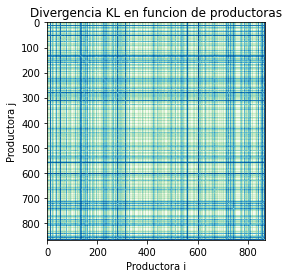

In [ ]:
plt.imshow(matrix, cmap = "GnBu", aspect = 'equal')

plt.title("Divergencia KL en funcion de productoras")

plt.xlabel("Productora i")
plt.ylabel("Productora j")

#plt.xticks(ticks= [])
#plt.yticks(ticks= [])